<a href="https://colab.research.google.com/github/ashmit009/Dataviisualization/blob/main/DataVisualizationLab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


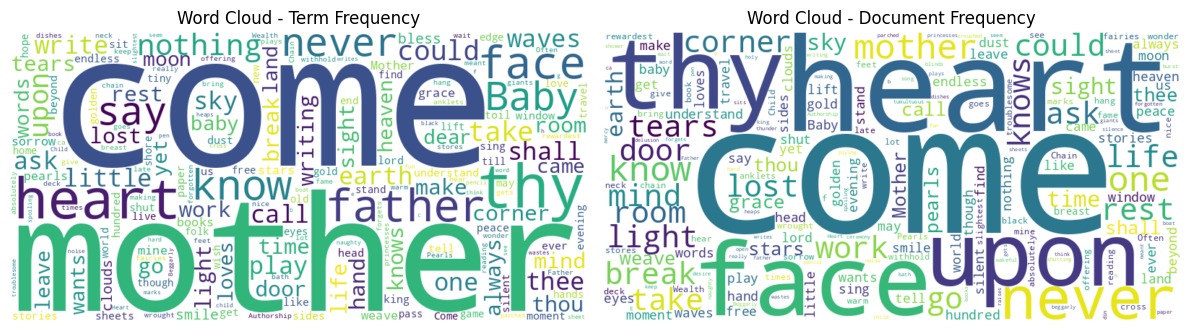

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Path to the directory containing your text files
directory_path = 'corpus/'

# Function to read text from files and combine into a single string
def read_files(directory):
    combined_text = ""
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r') as file:
                text = file.read()
                combined_text += text + " "
    return combined_text

# Read text from files and split into documents
documents = {}
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r') as file:
            documents[filename] = file.read()

# Combine all documents' text into a single string
corpus_text = ' '.join(documents.values())

# Tokenize the corpus text and remove stop words
stop_words = set(stopwords.words('english'))
tokens = nltk.word_tokenize(corpus_text)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Calculate term frequency
term_freq = defaultdict(int)
for word in filtered_tokens:
    term_freq[word] += 1

# Generate word cloud based on term frequency
wordcloud_term = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_freq)

# Calculate document frequency for each word
word_document_freq = defaultdict(int)
for doc_text in documents.values():
    words_in_doc = set(nltk.word_tokenize(doc_text))
    filtered_words = [word for word in words_in_doc if word.lower() not in stop_words and word.isalpha()]
    for word in filtered_words:
        word_document_freq[word] += 1

# Generate word cloud based on document frequency
wordcloud_doc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_document_freq)

# Display the word clouds using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_term, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Term Frequency')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_doc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Document Frequency')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


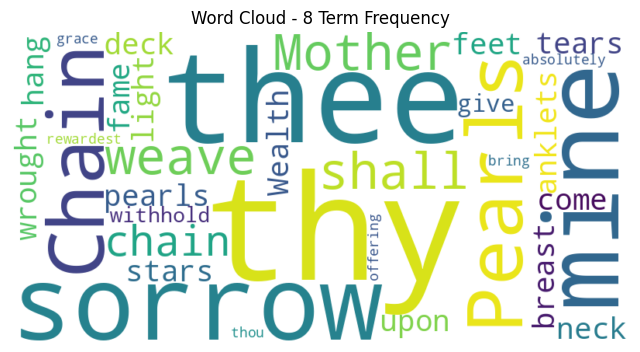

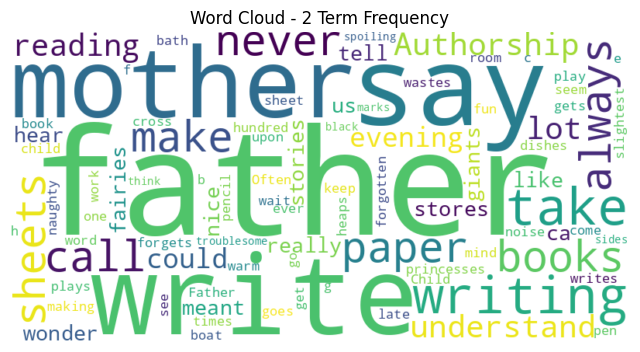

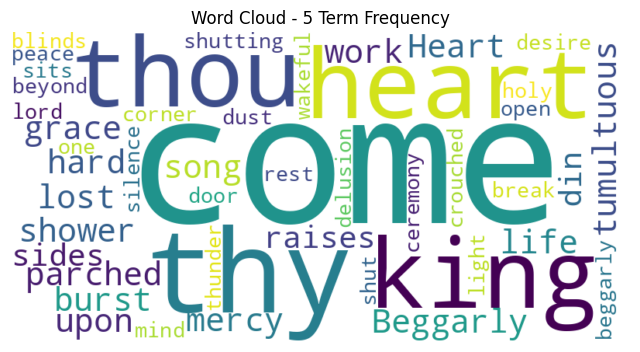

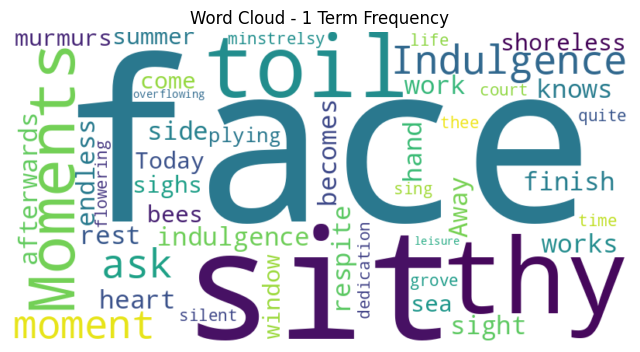

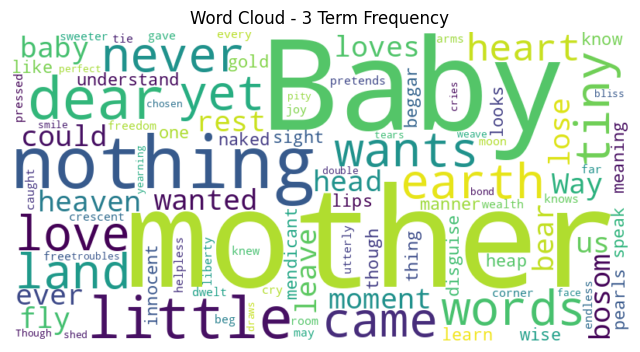

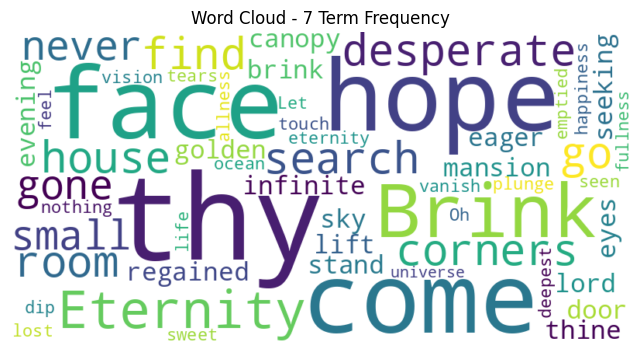

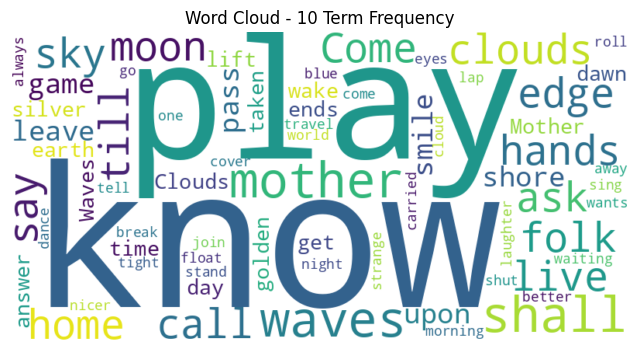

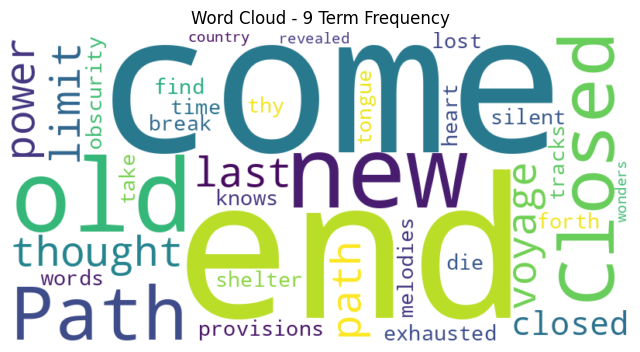

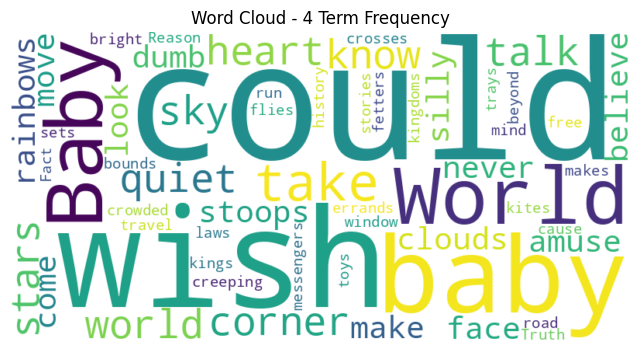

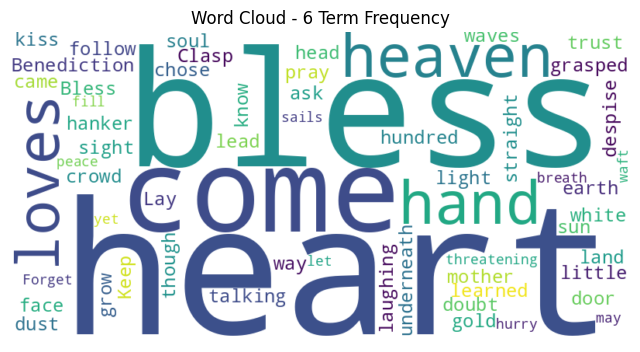

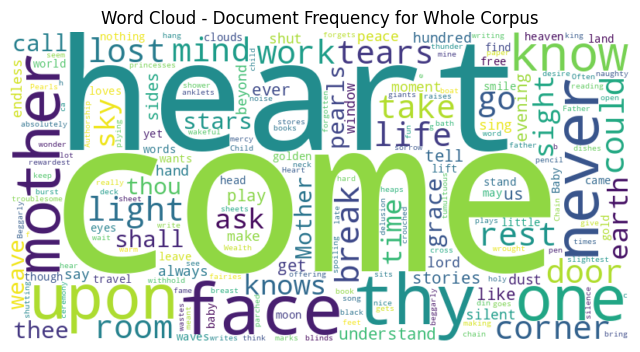

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Path to the directory containing your text files
directory_path = 'corpus/'

# Function to read text from files and combine into a single string
def read_files(directory):
    texts = {}
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r') as file:
                texts[filename] = file.read()
    return texts

# Read text from files
documents = read_files(directory_path)

# Combine all documents' text into a single string
corpus_text = ' '.join(documents.values())

# Tokenize the corpus text and remove stop words
stop_words = set(stopwords.words('english'))
corpus_tokens = nltk.word_tokenize(corpus_text)
filtered_corpus_tokens = [word for word in corpus_tokens if word.lower() not in stop_words and word.isalpha()]

# Calculate document frequency for whole corpus
word_document_freq = defaultdict(int)
for doc_text in documents.values():
    words_in_doc = set(nltk.word_tokenize(doc_text))
    filtered_words = [word for word in words_in_doc if word.lower() not in stop_words and word.isalpha()]
    for word in filtered_words:
        word_document_freq[word] += 1

# Generate word cloud based on document frequency for the whole corpus
wordcloud_doc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_document_freq)

# Generate word clouds based on term frequency for each document
for filename, doc_text in documents.items():
    doc_tokens = nltk.word_tokenize(doc_text)
    filtered_doc_tokens = [word for word in doc_tokens if word.lower() not in stop_words and word.isalpha()]
    term_freq = defaultdict(int)
    for word in filtered_doc_tokens:
        term_freq[word] += 1
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_freq)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {filename.split(".")[0]} Term Frequency')
    plt.show()

# Display the word cloud based on document frequency for the whole corpus
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_doc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Document Frequency for Whole Corpus')
plt.show()
